In [13]:
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="",
  database="blog2021"
)

cursor = mydb.cursor()

In [34]:
sql = "INSERT INTO users (email, password, firstname, lastname) VALUES (%s, %s, %s, %s)"
val = [
    ("john@gmail.com", "password", "john", "doe"),
    ("james@gmail.com", "password2", "james", "smith")
]
cursor.executemany(sql, val)
mydb.commit()

In [43]:
cursor.reset()
sql = "SELECT * FROM users"
cursor.execute(sql)
result = cursor.fetchall()
print(result)

[(15, 'john@gmail.com', 'newpassword', 'john', 'doe', None, None, None, datetime.datetime(2021, 12, 2, 21, 4, 25)), (16, 'james@gmail.com', 'password2', 'james', 'smith', None, None, None, datetime.datetime(2021, 12, 2, 20, 55, 53))]


In [36]:
cursor.reset()
sql = "DELETE FROM users WHERE id < %s"
# val = ('John@gmail.com', )
val = (15, )
cursor.execute(sql, val)
mydb.commit()

In [42]:
cursor.reset()
sql = "UPDATE users SET password=%s WHERE email=%s"
val = ('newpassword', 'john@gmail.com')
cursor.execute(sql, val)
mydb.commit()

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

%matplotlib notebook
# %matplotlib inline

<IPython.core.display.Javascript object>


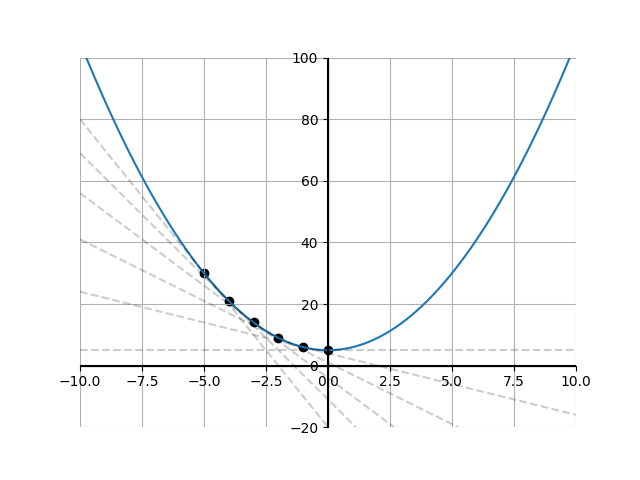

In [184]:
x = np.linspace(-10, 10, 100)
y = x**2 + 5
fig, ax = plt.subplots()
parabola = plt.plot(x, y)

def init():
    ax.axhline(0, color='k')
    ax.axvline(0, color='k')
    ax.set_xlim(-10, 10)
    ax.set_ylim(-20, 100)
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.grid(True)

def update(frame):
    ax.axline((frame, frame**2+5), slope=2*frame, c='k', alpha=.2, ls='--')
    ax.scatter(frame, frame**2+5, c='black')

ani = FuncAnimation(fig, update, frames=np.arange(-5, 1, 1), init_func=init, repeat=False)    
plt.show()

In [185]:
%matplotlib inline
# each point is length, width, type (0, 1)

data = [[3,   1.5, 1],
        [2,   1,   0],
        [4,   1.5, 1],
        [3,   1,   0],
        [3.5, .5,  1],
        [2,   .5,  0],
        [5.5,  1,  1],
        [1,    1,  0]]

mystery_flower = [4.5, 1]

In [177]:
# activation function

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_p(x):
    return sigmoid(x) * (1-sigmoid(x))

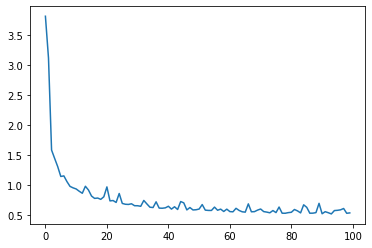

In [186]:
def train():
    #random init of weights
    w1 = np.random.randn()
    w2 = np.random.randn()
    b = np.random.randn()
    
    iterations = 10000
    learning_rate = 0.1
    costs = [] # keep costs during training, see if they go down
    
    for i in range(iterations):
        # get a random point
        ri = np.random.randint(len(data))
        point = data[ri]
        
        z = point[0] * w1 + point[1] * w2 + b
        pred = sigmoid(z) # networks prediction
        
        target = point[2]
        
        # cost for current random point
        cost = np.square(pred - target)
        
        # print the cost over all data points every 1k iters
        if i % 100 == 0:
            c = 0
            for j in range(len(data)):
                p = data[j]
                p_pred = sigmoid(w1 * p[0] + w2 * p[1] + b)
                c += np.square(p_pred - p[2])
            costs.append(c)
        
        dcost_dpred = 2 * (pred - target)
        dpred_dz = sigmoid_p(z)
        
        dz_dw1 = point[0]
        dz_dw2 = point[1]
        dz_db = 1
        
        dcost_dz = dcost_dpred * dpred_dz
        
        dcost_dw1 = dcost_dz * dz_dw1
        dcost_dw2 = dcost_dz * dz_dw2
        dcost_db = dcost_dz * dz_db
        
        w1 = w1 - learning_rate * dcost_dw1
        w2 = w2 - learning_rate * dcost_dw2
        b = b - learning_rate * dcost_db
        
    return costs, w1, w2, b
        
costs, w1, w2, b = train()

plt.plot(costs)

c:\projects\ml_gau\env\lib\site-packages\numpy\ma\core.py:2829: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  _data = np.array(data, dtype=dtype, copy=copy,


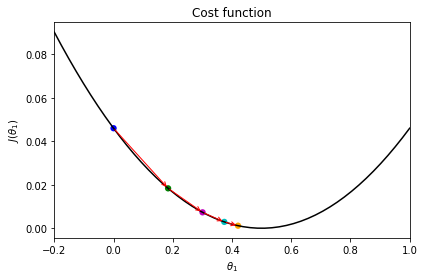

In [191]:
import numpy as np
import matplotlib.pyplot as plt

# The data to fit
m = 20
theta1_true = 0.5
x = np.linspace(-1,1,m)
y = theta1_true * x

# The plot: LHS is the data, RHS will be the cost function.
fig, ax = plt.subplots()


def cost_func(theta1):
    """The cost function, J(theta1) describing the goodness of fit."""
    theta1 = np.atleast_2d(np.asarray(theta1))
    return np.average((y-hypothesis(x, theta1))**2, axis=1)/2

def hypothesis(x, theta1):
    """Our "hypothesis function", a straight line through the origin."""
    return theta1*x

# First construct a grid of theta1 parameter pairs and their corresponding
# cost function values.
theta1_grid = np.linspace(-0.2,1,50)
J_grid = cost_func(theta1_grid[:,np.newaxis])

# The cost function as a function of its single parameter, theta1.
ax.plot(theta1_grid, J_grid, 'k')

# Take N steps with learning rate alpha down the steepest gradient,
# starting at theta1 = 0.
N = 5
alpha = 1
theta1 = [0]
J = [cost_func(theta1[0])[0]]
for j in range(N-1):
    last_theta1 = theta1[-1]
    this_theta1 = last_theta1 - alpha / m * np.sum((hypothesis(x, last_theta1) - y) * x)
    theta1.append(this_theta1)
    J.append(cost_func(this_theta1))

# Annotate the cost function plot with coloured points indicating the
# parameters chosen and red arrows indicating the steps down the gradient.
# Also plot the fit function on the LHS data plot in a matching colour.
colors = ['b', 'g', 'm', 'c', 'orange']

for j in range(1,N):
    ax.annotate('', xy=(theta1[j], J[j]), xytext=(theta1[j-1], J[j-1]),
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center')
    ax.axline((theta1[j], J[j]), slope=)


# Labels, titles and a legend.
ax.scatter(theta1, J, c=colors, s=40, lw=0)
ax.set_xlim(-0.2,1)
ax.set_xlabel(r'$\theta_1$')
ax.set_ylabel(r'$J(\theta_1)$')
ax.set_title('Cost function')


plt.tight_layout()
plt.show()